# OLIMOV AMIR

### Мои данные реальные. Они были взяты из Национального банка Таджикистана за период с 2017 по 2025 год.

In [110]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_percentage_error, r2_score, mean_squared_error
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_percentage_error, r2_score
import matplotlib.pyplot as plt
import itertools
from tqdm.auto import tqdm
import warnings

In [112]:
warnings.filterwarnings("ignore")

df = pd.read_excel('Парсинг_НБТ_5г_золото_цены_продажи.xlsx')
df.drop(columns=['m_price'], inplace=True)
df['price'].interpolate(method='linear', limit_direction='both', inplace=True)
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df1 = df.copy()
df

,price
date,
2017-06-13,1971.750000
2017-06-14,1960.370000
2017-06-15,1970.320000
2017-06-16,1958.870000
2017-06-17,1957.126667
...,...
2025-04-08,5492.410000
2025-04-09,5449.870000
2025-04-10,5521.740000


<Axes: xlabel='date'>

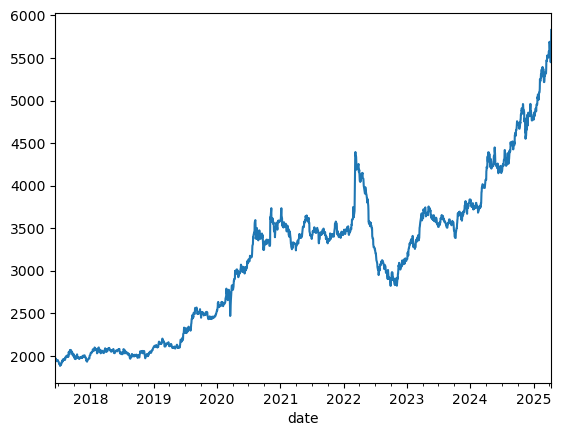

In [114]:
df.price.plot()

In [116]:
df['ewm_90'] = df.price.ewm(90).mean()
df['ewm_180'] = df.price.ewm(180).mean()
df['ewm_365'] = df.price.ewm(365).mean()

df

,price,ewm_90,ewm_180,ewm_365
date,,,,
2017-06-13,1971.750000,1971.750000,1971.750000,1971.750000
2017-06-14,1960.370000,1966.028564,1966.044238,1966.052216
2017-06-15,1970.320000,1967.474878,1967.477396,1967.478705
2017-06-16,1958.870000,1965.287872,1965.307631,1965.317688
2017-06-17,1957.126667,1963.619361,1963.653259,1963.670507
...,...,...,...,...
2025-04-08,5492.410000,5078.992721,4759.360000,4351.743321
2025-04-09,5449.870000,5083.068295,4763.174973,4354.744873
2025-04-10,5521.740000,5087.888863,4767.365941,4357.934662


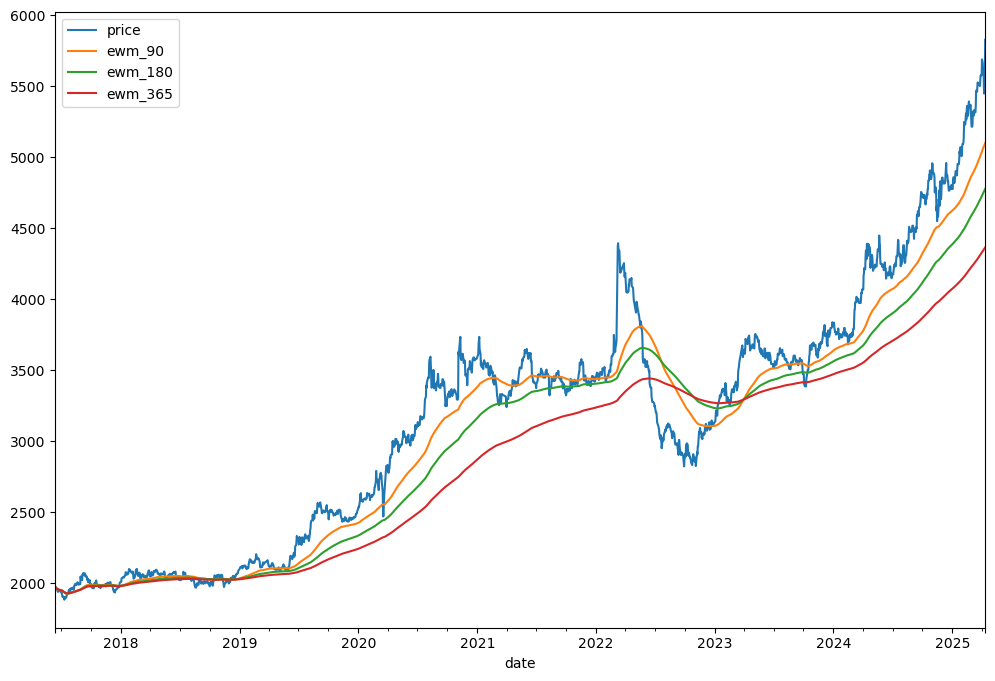

In [118]:
plt.figure(figsize=[12,8])
df['price'].plot(label='price')
df['ewm_90'].plot(label='ewm_90')
df['ewm_180'].plot(label='ewm_180')
df['ewm_365'].plot(label='ewm_365')
plt.legend()

### Тест Дики-Фюлера 

In [135]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df["price"])
print("p-value:", result[1])

p-value: 0.9968650907081732


### Уверенно скажу что есть тренд

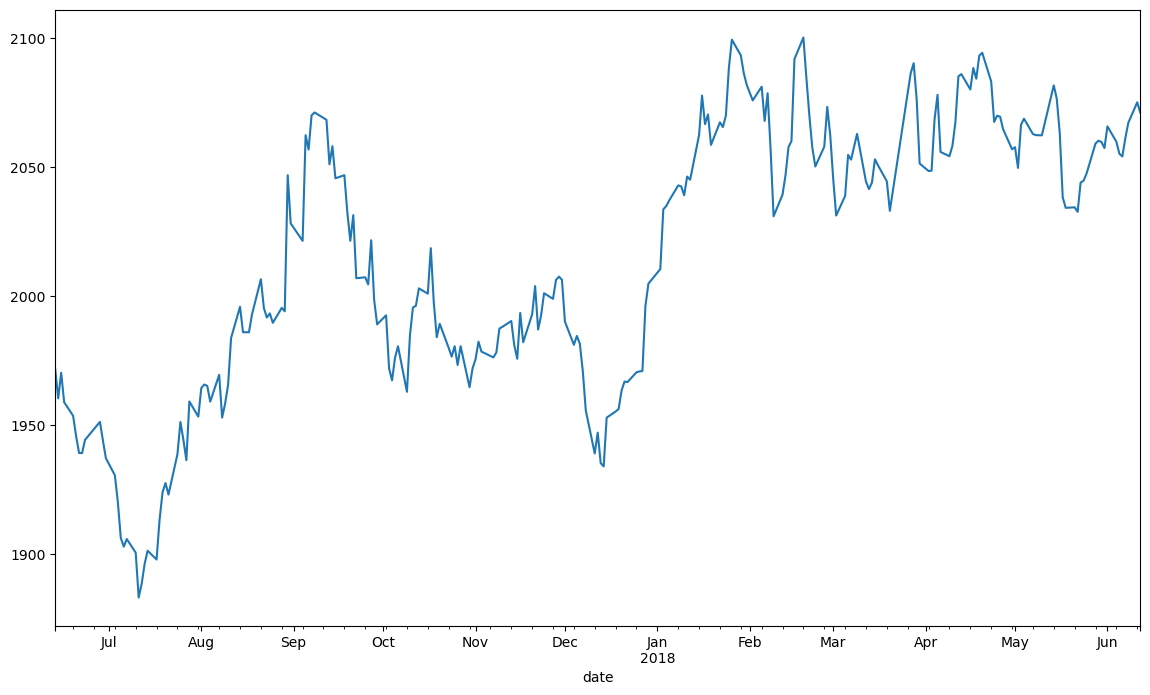

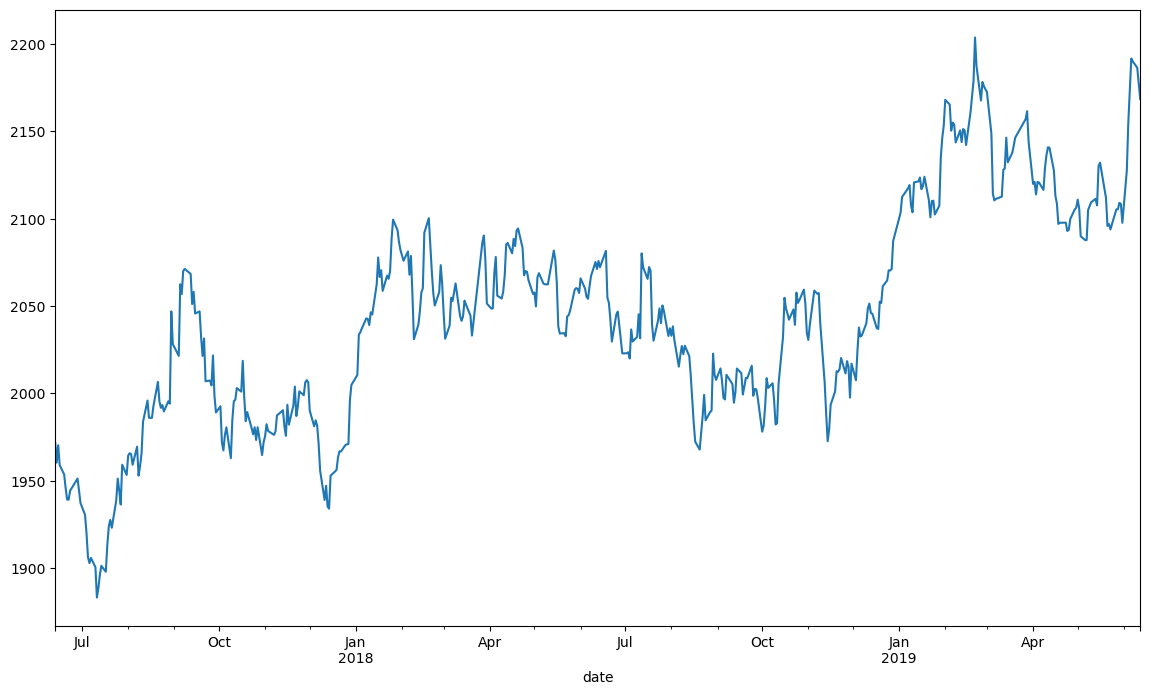

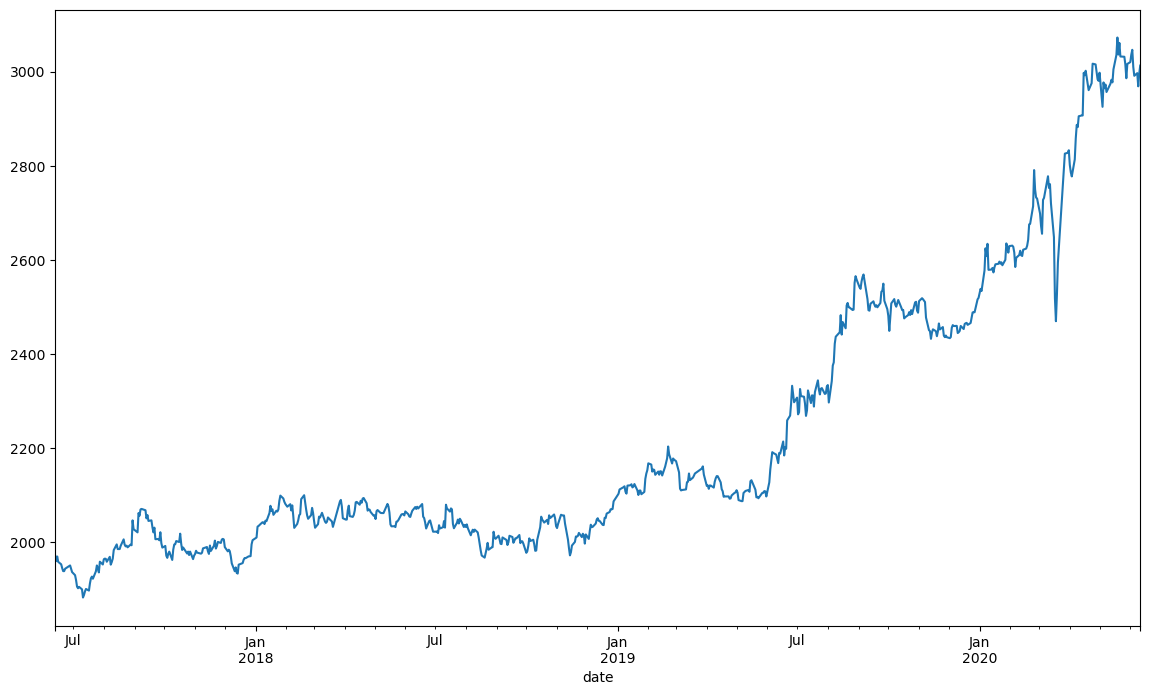

In [84]:
import matplotlib.pyplot as plt
for years in range(1, 4):
    df.iloc[:(365 * years)].price.plot()
    plt.show()

### Сезонности не вижу но это не факт что её нет

<Axes: xlabel='year'>

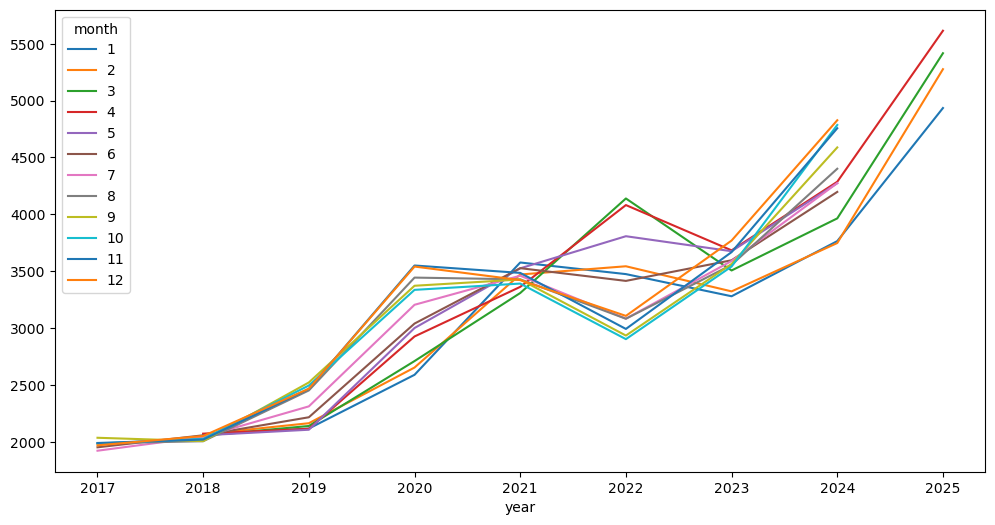

In [86]:
df_pivot = pd.pivot_table(df, values='price', columns='month', index='year')
df_pivot.plot(figsize=[12,6])

<Axes: xlabel='month'>

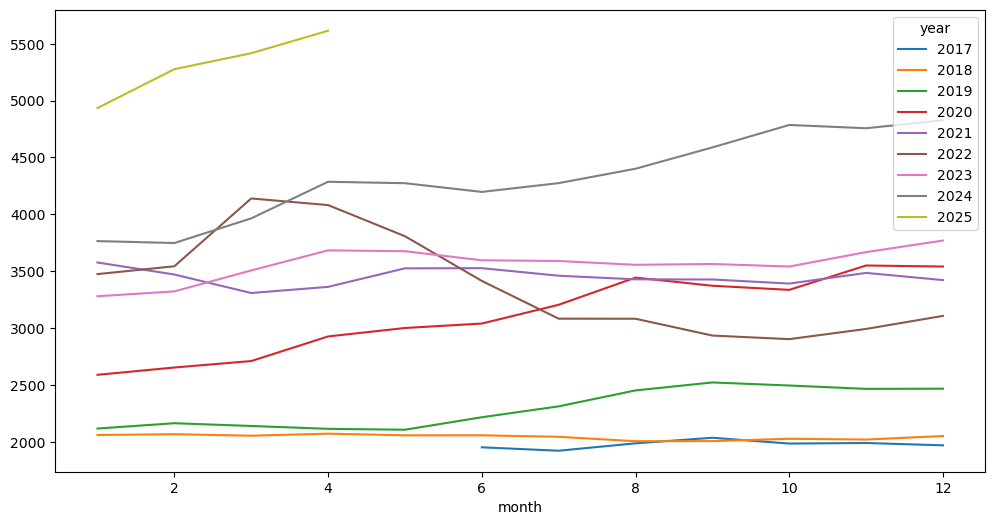

In [88]:
df_pivot = pd.pivot_table(df, values='price', columns='year', index='month')
df_pivot.plot(figsize=[12,6])

In [20]:
# тут пока не видна компонента сезонности

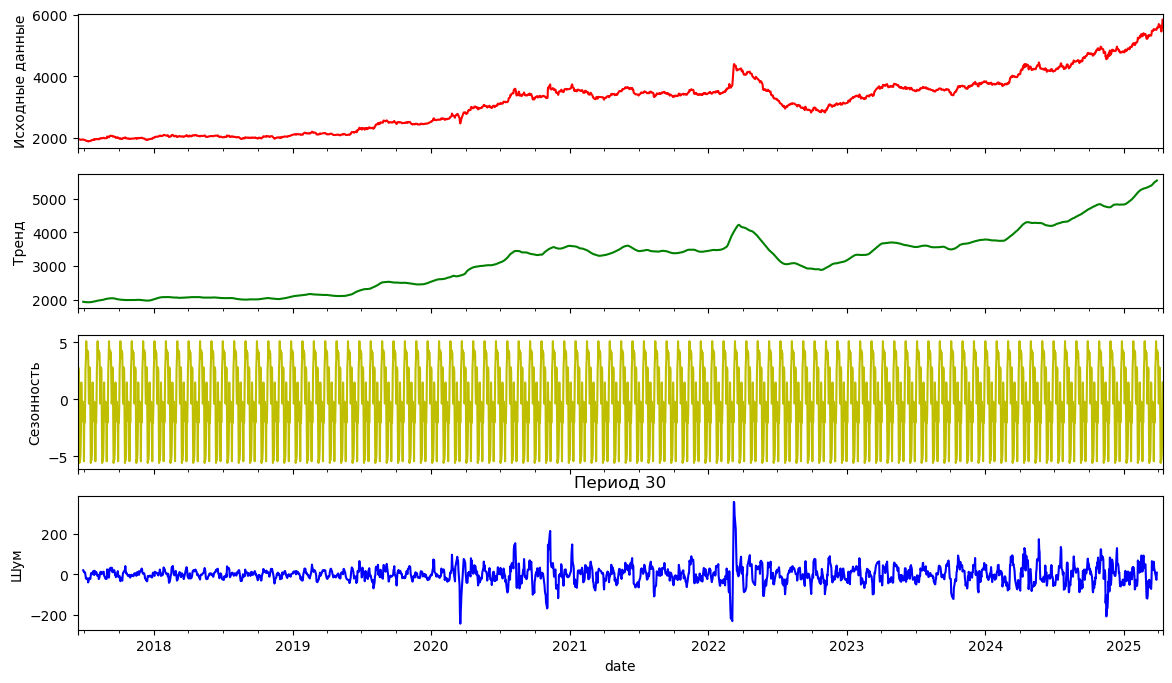

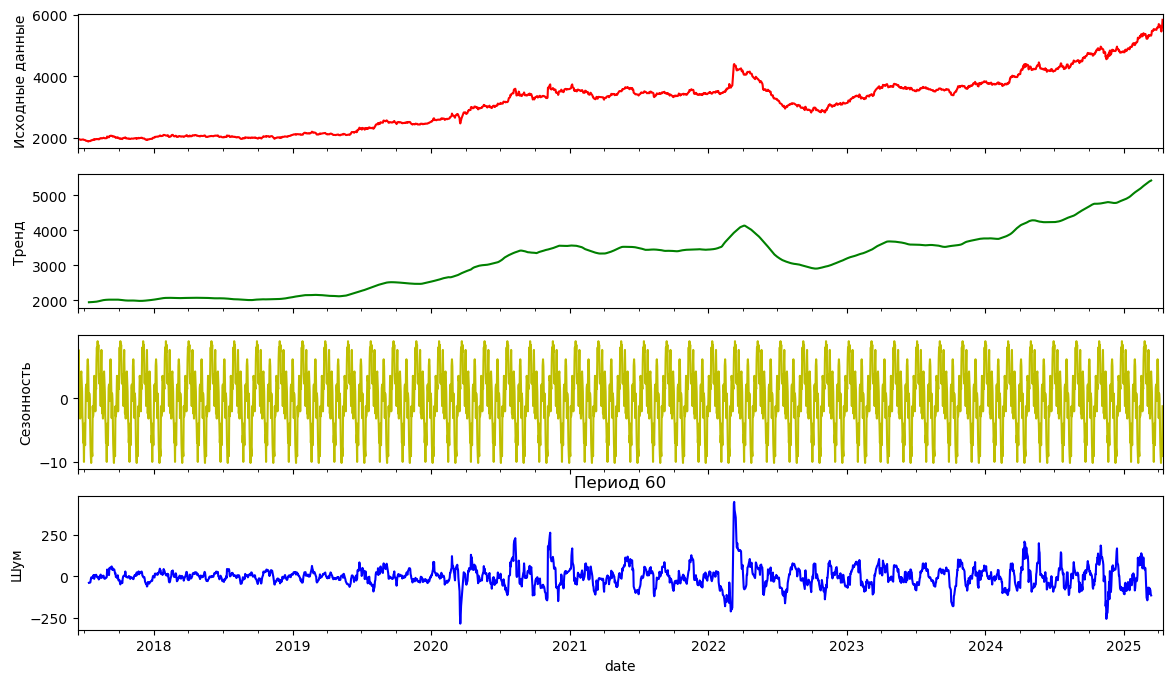

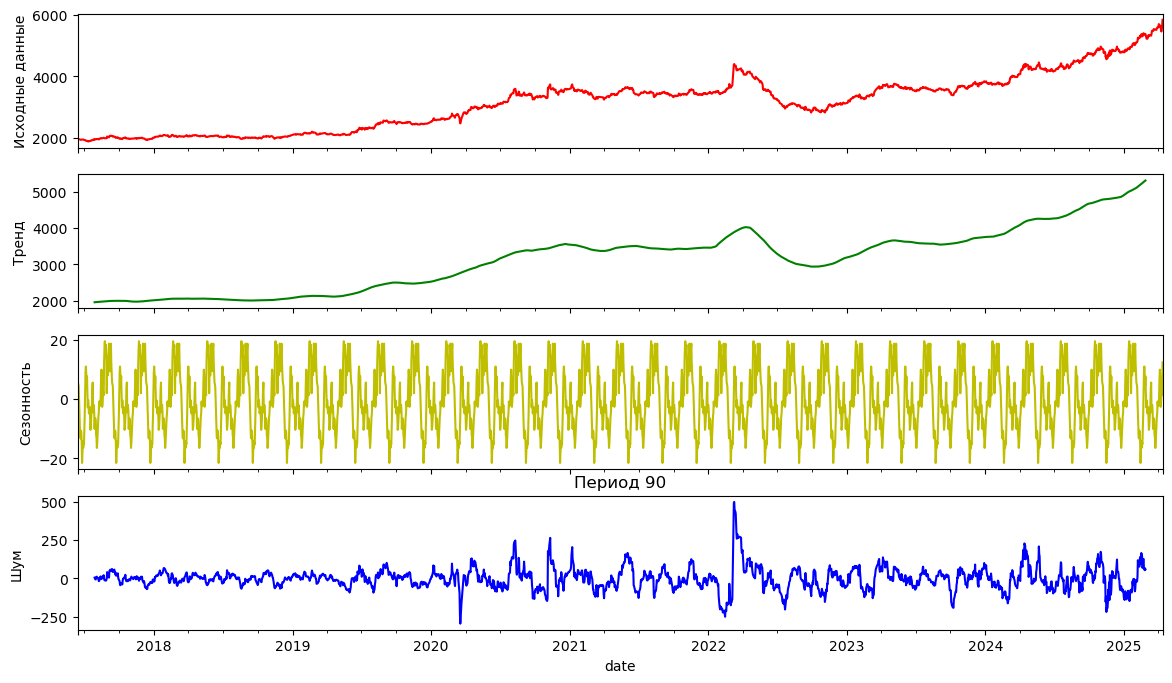

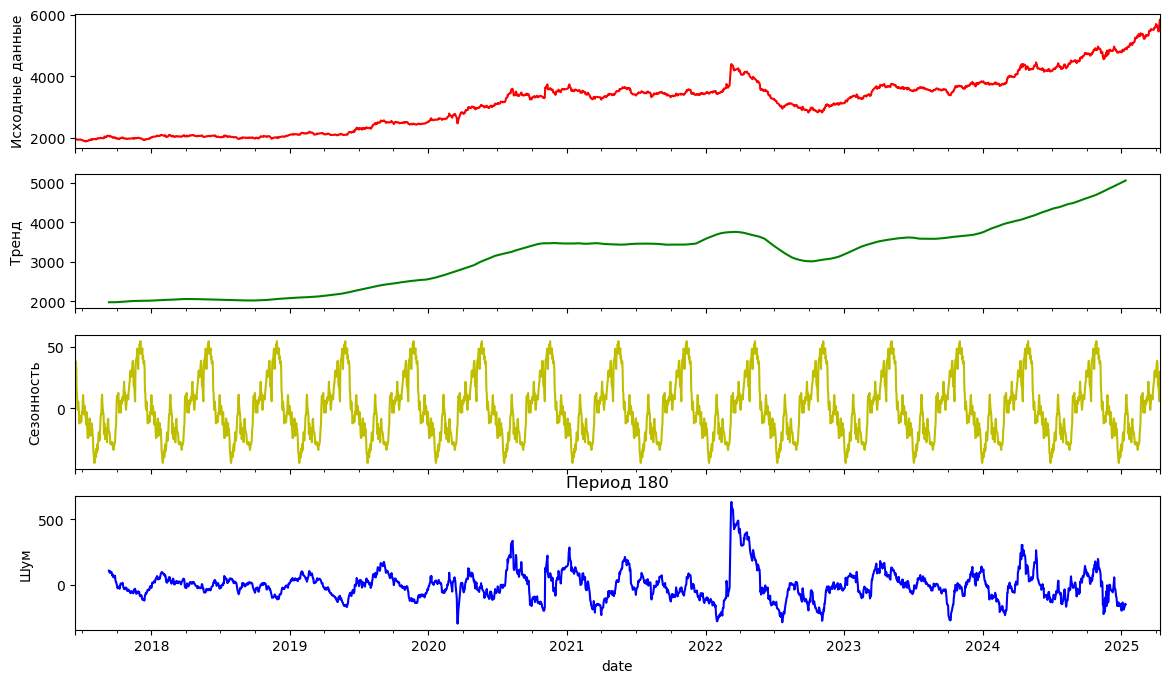

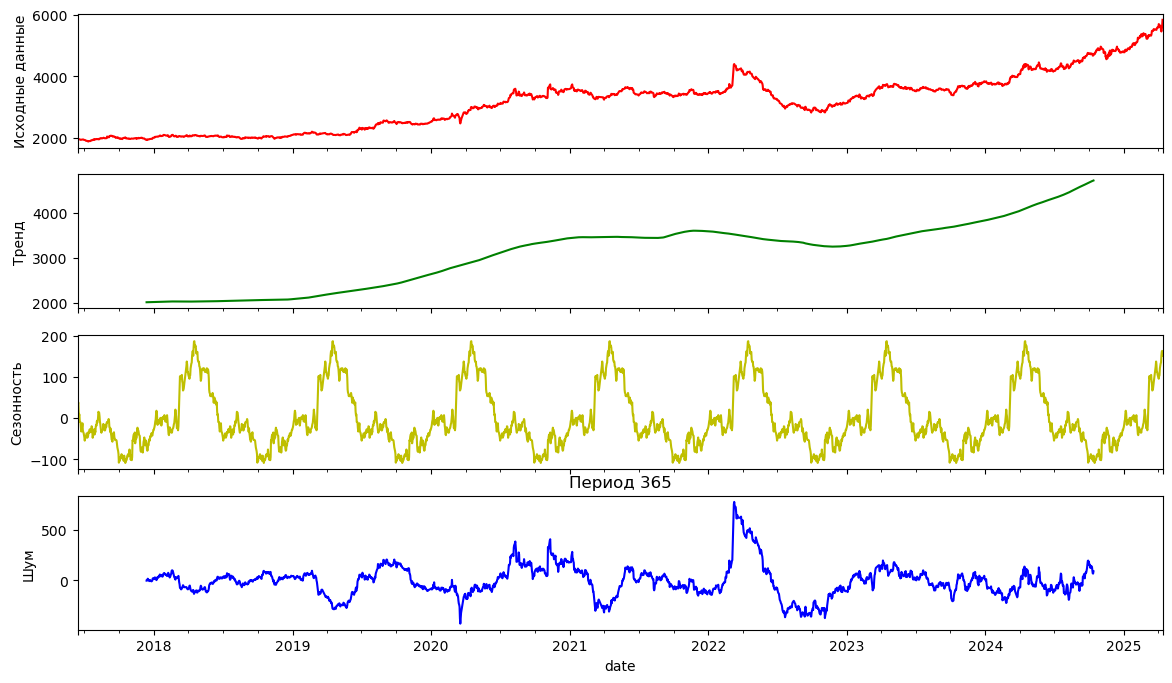

In [110]:
plt.rcParams["figure.figsize"] = (14, 8)



for i in [30, 60, 90, 180, 365]:
    res = sm.tsa.seasonal_decompose(df.price, model='additive', period=i)
    _, axes = plt.subplots(4, 1, sharex=True)
    plt.title(f"Период {i}")
    res.observed.plot(ax=axes[0], legend=False, color='r')
    axes[0].set_ylabel('Исходные данные')
    res.trend.plot(ax=axes[1], legend=False, color='g')
    axes[1].set_ylabel('Тренд')
    res.seasonal.plot(ax=axes[2], legend=False, color='y')
    axes[2].set_ylabel('Сезонность')
    res.resid.plot(ax=axes[3], legend=False, color='b')
    axes[3].set_ylabel('Шум')
    plt.show()


Text(0, 0.5, 'Шум')

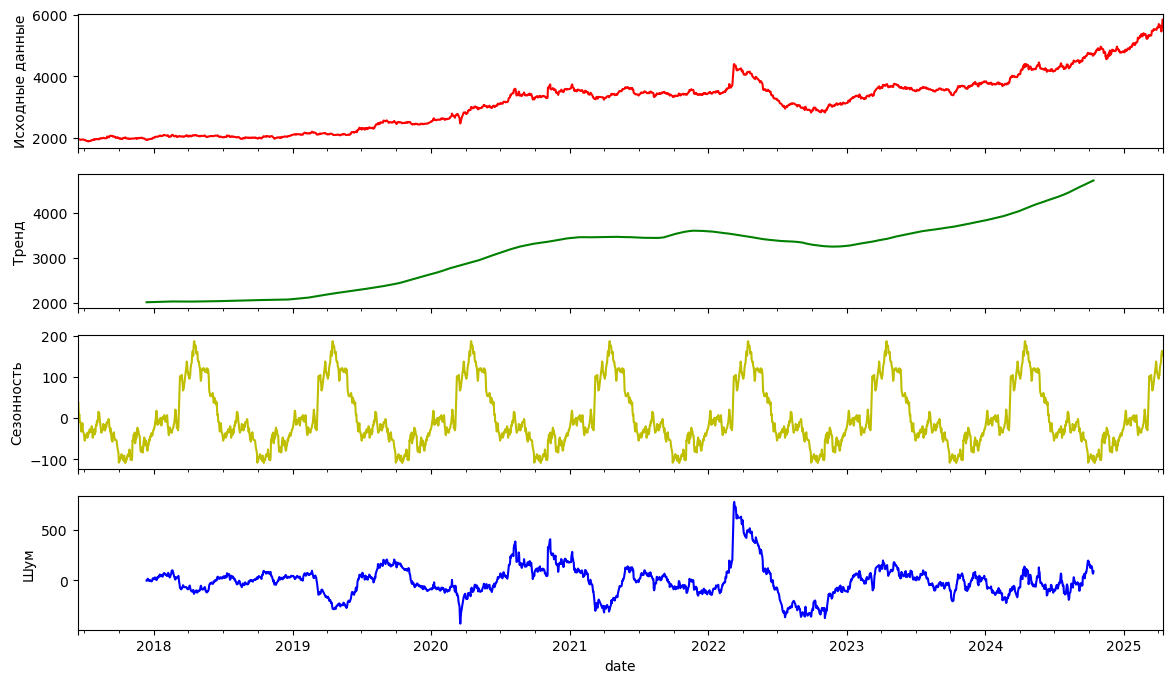

In [114]:
plt.rcParams["figure.figsize"] = (14, 8)

res = sm.tsa.seasonal_decompose(df.price, model='additive', period=365)
_, axes = plt.subplots(4, 1, sharex=True)

res.observed.plot(ax=axes[0], legend=False, color='r')
axes[0].set_ylabel('Исходные данные')
res.trend.plot(ax=axes[1], legend=False, color='g')
axes[1].set_ylabel('Тренд')
res.seasonal.plot(ax=axes[2], legend=False, color='y')
axes[2].set_ylabel('Сезонность')
res.resid.plot(ax=axes[3], legend=False, color='b')
axes[3].set_ylabel('Шум')

## Значит период сезонности - 365 дней

In [26]:
#((0, 2, 0), (0, 1, 1, 12))

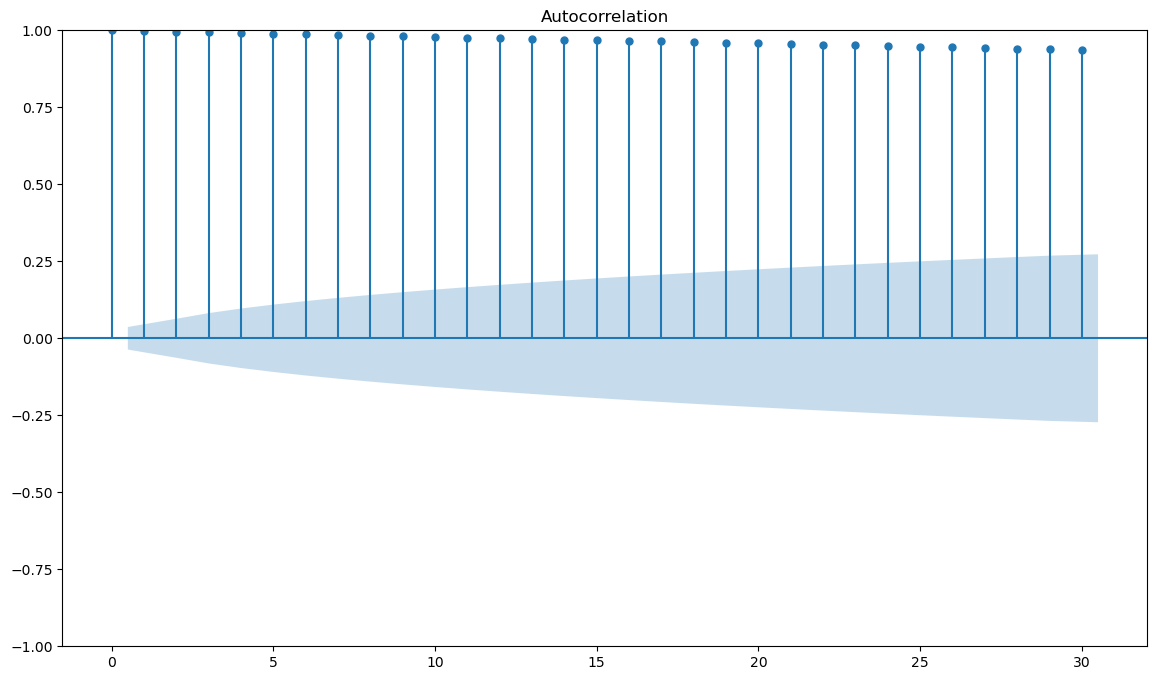

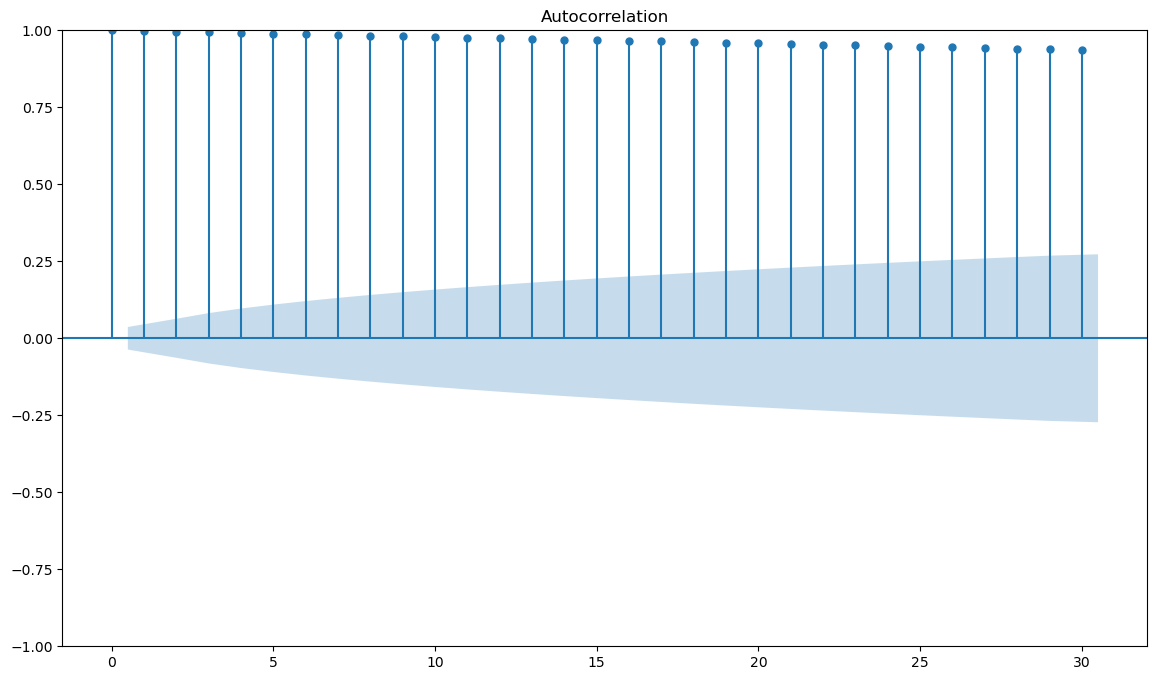

In [120]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df.price.values, lags=30)

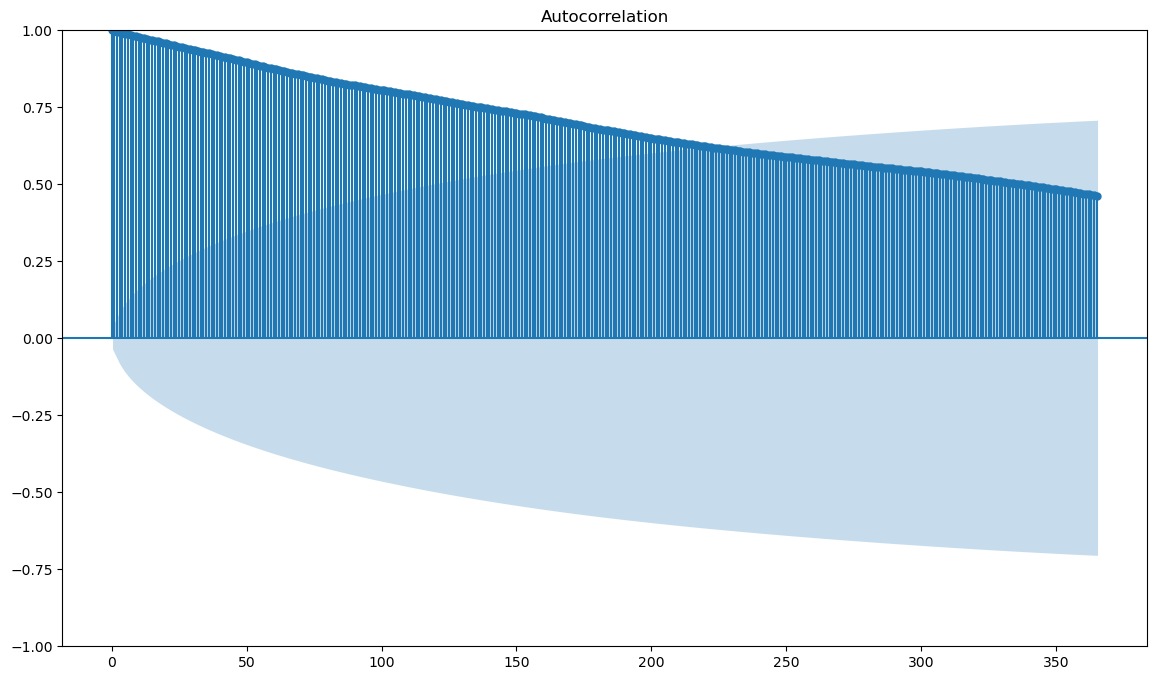

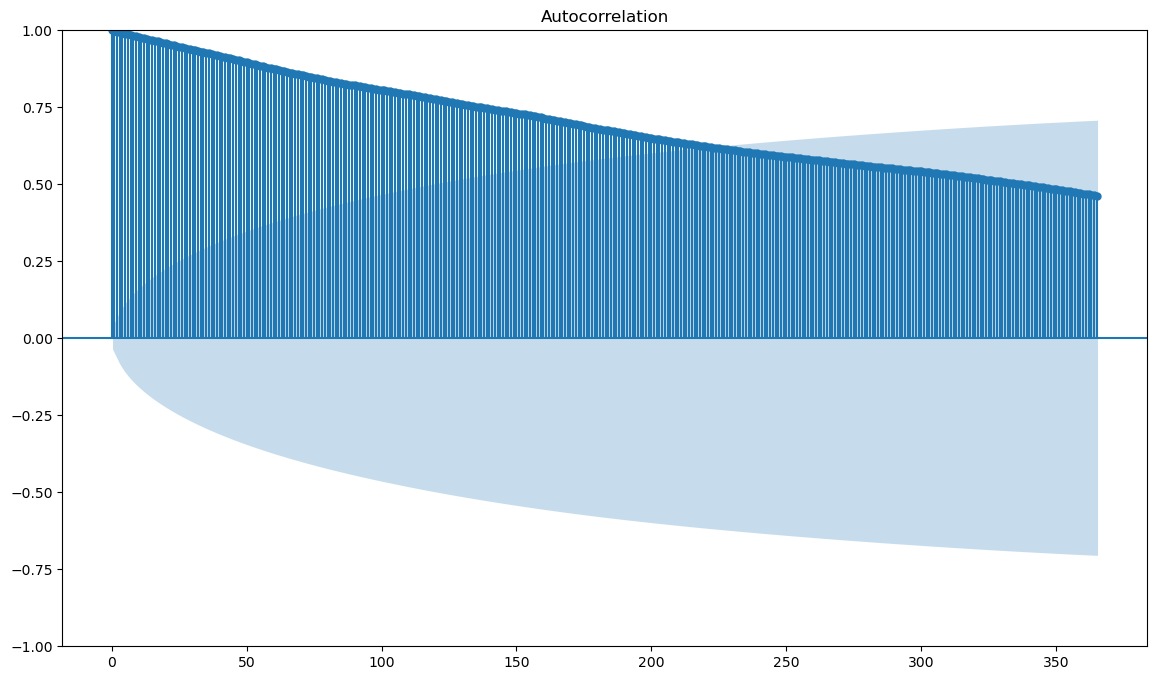

In [126]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df.price.values, lags=365)

In [15]:
df['year'] = df.index.year
df['month'] = df.index.month
df['dow'] = df.index.dayofweek

df

,price,ewm_90,ewm_180,ewm_365,year,month,dow
date,,,,,,,
2017-06-13,1971.750000,1971.750000,1971.750000,1971.750000,2017,6,1
2017-06-14,1960.370000,1966.028564,1966.044238,1966.052216,2017,6,2
2017-06-15,1970.320000,1967.474878,1967.477396,1967.478705,2017,6,3
2017-06-16,1958.870000,1965.287872,1965.307631,1965.317688,2017,6,4
2017-06-17,1957.126667,1963.619361,1963.653259,1963.670507,2017,6,5
...,...,...,...,...,...,...,...
2025-04-08,5492.410000,5078.992721,4759.360000,4351.743321,2025,4,1
2025-04-09,5449.870000,5083.068295,4763.174973,4354.744873,2025,4,2
2025-04-10,5521.740000,5087.888863,4767.365941,4357.934662,2025,4,3


# Baseline

In [120]:
mean = df["price"].mean()
mean_col = [mean for i in range(len(df))]
mape = mean_absolute_percentage_error(df['price'], mean_col)
r2 = r2_score(df['price'], mean_col)
print(f"MAPE: {mape:.4f}")
print(f"R²: {r2}")

MAPE: 0.2589
R²: 0.0


# Metrics

In [123]:
# def get_metrics(val, pred):
#     rmse = np.sqrt(mean_squared_error(val, pred))
#     mape = mean_absolute_percentage_error(val, pred)
#     r2 = r2_score(val, pred)
#     print(f"RMSE: {rmse:.4f}")
#     print(f"MAPE: {mape:.4f}")
#     print(f"R²: {r2:.4f}")
def get_metrics(val, pred, return_values=False):
    rmse = np.sqrt(mean_squared_error(val, pred))
    mape = mean_absolute_percentage_error(val, pred)
    r2 = r2_score(val, pred)
    
    if return_values:
        return rmse, mape, r2
    else:
        print(f"RMSE: {rmse:.4f}")
        print(f"MAPE: {mape:.4f}")
        print(f"R²: {r2:.4f}")

# Train & Test

In [126]:
train_size = int(len(df) * 0.80)
train, val = df.iloc[:train_size], df.iloc[train_size:]

# ARIMA

In [259]:
model = sm.tsa.arima.ARIMA(train.price)
arima = model.fit()
preds = arima.predict(start=len(train), end=len(train) + len(val) - 1)

get_metrics(val["price"], preds)

RMSE: 1616.9008
MAPE: 0.3345
R²: -6.8026


In [255]:
from pmdarima import auto_arima
model = auto_arima(train.price, seasonal=False, stepwise=True, trace=True)
model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=20478.938, Time=1.99 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=20543.302, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=20481.516, Time=0.17 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=20489.257, Time=0.48 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=20543.663, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=20477.791, Time=0.99 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=20477.634, Time=0.78 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=20478.844, Time=0.88 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=20476.043, Time=0.45 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=20477.773, Time=1.07 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=20475.896, Time=0.27 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=20477.838, Time=0.41 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=20479.751, Time=2.06 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=20475.396, Time=0.16 sec
 ARIMA(1,1,0)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2288
Model:               SARIMAX(2, 1, 0)   Log Likelihood              -10234.698
Date:                Wed, 07 May 2025   AIC                          20475.396
Time:                        22:08:12   BIC                          20492.601
Sample:                    06-13-2017   HQIC                         20481.670
                         - 09-17-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1569      0.011     14.454      0.000       0.136       0.178
ar.L2          0.0584      0.013      4.407      0.000       0.032       0.084
sigma2       451.7110      3.482    129.724      0.000     444.886     458.536
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             86803.67
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               6.09   Skew:                             1.66
Prob(H) (two-sided):                  0.00   Kurtosis:                        33.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [257]:
model = sm.tsa.arima.ARIMA(train.price, order=(2, 1, 0))
arima = model.fit()
preds = arima.predict(start=len(train), end=len(train) + len(val) - 1)

get_metrics(val["price"], preds)

RMSE: 992.5077
MAPE: 0.1727
R²: -1.9400


### В наших данных есть тренд и сезонность и по этому модель АРИМА нам не подходит

# SARIMA

In [171]:
model = sm.tsa.arima.ARIMA(train.price, order=(0, 2, 0), seasonal_order=(0, 1, 1, 365))
arima = model.fit()
preds = arima.predict(start=len(train), end=len(train) + len(val) - 1)

get_metrics(val["price"], preds)

MemoryError: Unable to allocate 9.16 GiB for an array with shape (733, 733, 2289) and data type float64

### чтобы вычислить такие объёмные матрицы для сезонности с периодом 365 дней не достаточно ресурсов моего компа (не смотря на то что мой ноут игравой 😅), по этому либо не будем обучать модели SARIMSA и SARIMAX либо укажем период по меньше

In [30]:
model = sm.tsa.arima.ARIMA(train.price, order=(5, 1, 2), seasonal_order=(0, 1, 1, 20))
arima = model.fit()
preds = arima.predict(start=len(train), end=len(train) + len(val) - 1)

get_metrics(val["price"], preds)

RMSE: 765.9813
MAPE: 0.1298
R²: -0.7511


In [28]:
from pmdarima import auto_arima
model = auto_arima(df["price"], seasonal=True, m=20, stepwise=True, suppress_warnings=True, trace=True)

model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[20] intercept   : AIC=26349.515, Time=6.46 sec
 ARIMA(0,1,0)(0,0,0)[20] intercept   : AIC=26399.483, Time=0.11 sec
 ARIMA(1,1,0)(1,0,0)[20] intercept   : AIC=26359.021, Time=0.80 sec
 ARIMA(0,1,1)(0,0,1)[20] intercept   : AIC=26363.866, Time=1.54 sec
 ARIMA(0,1,0)(0,0,0)[20]             : AIC=26406.189, Time=0.10 sec
 ARIMA(2,1,2)(0,0,1)[20] intercept   : AIC=26347.540, Time=6.69 sec
 ARIMA(2,1,2)(0,0,0)[20] intercept   : AIC=26346.142, Time=2.73 sec
 ARIMA(2,1,2)(1,0,0)[20] intercept   : AIC=26347.540, Time=7.17 sec
 ARIMA(1,1,2)(0,0,0)[20] intercept   : AIC=26348.385, Time=2.13 sec
 ARIMA(2,1,1)(0,0,0)[20] intercept   : AIC=26349.543, Time=1.97 sec
 ARIMA(3,1,2)(0,0,0)[20] intercept   : AIC=26347.043, Time=4.03 sec
 ARIMA(2,1,3)(0,0,0)[20] intercept   : AIC=26347.280, Time=3.83 sec
 ARIMA(1,1,1)(0,0,0)[20] intercept   : AIC=26355.573, Time=0.85 sec
 ARIMA(1,1,3)(0,0,0)[20] intercept   : AIC=26349.497, Time=1.81 sec
 ARIM

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2861
Model:               SARIMAX(5, 1, 2)   Log Likelihood              -13157.549
Date:                Thu, 08 May 2025   AIC                          26333.097
Time:                        09:55:25   BIC                          26386.724
Sample:                    06-13-2017   HQIC                         26352.434
                         - 04-12-2025                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.1620      0.737      2.933      0.003       0.717       3.607
ar.L1          0.5083      0.025     20.426      0.000       0.460       0.557
ar.L2         -0.9213      0.027    -34.706      0.000      -0.973      -0.869
ar.L3          0.0454      0.017      2.632      0.008       0.012       0.079
ar.L4          0.0931      0.015      6.040      0.000       0.063       0.123
ar.L5         -0.0231      0.016     -1.464      0.143      -0.054       0.008
ma.L1         -0.3856      0.022    -17.315      0.000      -0.429      -0.342
ma.L2          0.9401      0.023     40.250      0.000       0.894       0.986
sigma2       583.1395      5.771    101.054      0.000     571.829     594.450
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):             40318.46
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               7.02   Skew:                             1.15
Prob(H) (two-sided):                  0.00   Kurtosis:                        21.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [276]:
model = sm.tsa.arima.ARIMA(train.price, order=(0, 2, 0), seasonal_order=(0, 1, 1, 29))
arima = model.fit()
preds = arima.predict(start=len(train), end=len(train) + len(val) - 1)

get_metrics(val["price"], preds)

RMSE: 124.7943
MAPE: 0.0218
R²: 0.9535


# SARIMAX

In [300]:
sarimax = SARIMAX(train['price'])
result = sarimax.fit()
preds = result.predict(start=len(train), end=len(train) + len(val) - 1)
get_metrics(val["price"], preds)

RMSE: 1026.3706
MAPE: 0.1792
R²: -2.1440


### Будем учитывать праздники

In [128]:
df['holiday'] = 0
holiday_dates = ["01-01", "02-23", "03-08", "03-21", "03-22", "03-23", "03-24", "05-01", "05-09", "06-27", "09-03", "09-09",
             "10-02", "10-05", "11-06", "11-16", "11-24"]

df['holiday'] = df.index.strftime("%m-%d").isin(holiday_dates).astype(int)
df['holiday'].sum()

134

In [88]:
model = SARIMAX(df['price'], order=(0,2,0), seasonal_order=(0,1,1,29), exog=df[['holiday']])
result = model.fit()
preds = result.predict(start=len(train), end=len(train) + len(val) - 1)
get_metrics(val["price"], preds)

RMSE: 45.5949
MAPE: 0.0070
R²: 0.9938


# Наивный подход

In [79]:
last_value = train["price"].iloc[-1]
forecast = pd.Series([last_value] * len(val), index=val.index)

get_metrics(val["price"], forecast)

RMSE: 993.8403
MAPE: 0.1730
R²: -1.9479


# Тройное экспоненциальное сглаживание

In [35]:
from statsmodels.tsa.api import ExponentialSmoothing

fit1 = ExponentialSmoothing(np.asarray(train.price), trend='add', seasonal='add', seasonal_periods=365).fit()

forecast = pd.Series(fit1.forecast(len(val)), index=val.index)
get_metrics(val["price"], forecast)

RMSE: 1077.3990
MAPE: 0.1902
R²: -2.4644


In [318]:
from statsmodels.tsa.api import ExponentialSmoothing

fit1 = ExponentialSmoothing(np.asarray(train.price), seasonal_periods=365).fit()
forecast = pd.Series(fit1.forecast(len(val)))
get_metrics(val["price"], forecast)


RMSE: 993.8403
MAPE: 0.1730
R²: -1.9479


# Prophet

In [330]:
from prophet import Prophet
from itertools import product

train_prophet = train.reset_index()[['date', 'price']].rename(columns={'date': 'ds', 'price': 'y'})
val_prophet = val.reset_index()[['date', 'price']].rename(columns={'date': 'ds', 'price': 'y'})

model = Prophet()
model.fit(train_prophet)

future = val_prophet[['ds']]
forecast = model.predict(future)

get_metrics(val_prophet['y'], forecast['yhat'])


23:03:29 - cmdstanpy - INFO - Chain [1] start processing
23:03:29 - cmdstanpy - INFO - Chain [1] done processing


RMSE: 618.1372
MAPE: 0.1008
R²: -0.1404


In [337]:
changepoint_scales = [0.001, 0.01, 0.1, 0.5]
seasonality_modes = ['additive', 'multiplicative']
seasonality_scales = [1.0, 5.0, 10.0]
best_rmse = float('inf')
best_params = None
best_forecast = None

for cp_scale, mode, s_scale in product(changepoint_scales, seasonality_modes, seasonality_scales):
    model = Prophet(changepoint_prior_scale=cp_scale, seasonality_mode=mode, seasonality_prior_scale=s_scale)
    model.fit(train_prophet)
    future = val_prophet[['ds']]
    forecast = model.predict(future)
    rmse, mape, r2 = get_metrics(val_prophet['y'], forecast['yhat'], return_values=True)
    
    if rmse < best_rmse:
        best_rmse = rmse
        best_params = (cp_scale, mode, s_scale)
        best_forecast = forecast

print(f"Best parameters: changepoint_prior_scale={best_params[0]}, seasonality_mode={best_params[1]}, seasonality_prior_scale={best_params[2]}")
print(f"RMSE: {best_rmse:.4f}")
get_metrics(val_prophet['y'], best_forecast['yhat'])

23:11:55 - cmdstanpy - INFO - Chain [1] start processing
23:11:55 - cmdstanpy - INFO - Chain [1] done processing
23:11:55 - cmdstanpy - INFO - Chain [1] start processing
23:11:55 - cmdstanpy - INFO - Chain [1] done processing
23:11:56 - cmdstanpy - INFO - Chain [1] start processing
23:11:56 - cmdstanpy - INFO - Chain [1] done processing
23:11:56 - cmdstanpy - INFO - Chain [1] start processing
23:11:56 - cmdstanpy - INFO - Chain [1] done processing
23:11:56 - cmdstanpy - INFO - Chain [1] start processing
23:11:56 - cmdstanpy - INFO - Chain [1] done processing
23:11:57 - cmdstanpy - INFO - Chain [1] start processing
23:11:57 - cmdstanpy - INFO - Chain [1] done processing
23:11:57 - cmdstanpy - INFO - Chain [1] start processing
23:11:57 - cmdstanpy - INFO - Chain [1] done processing
23:11:57 - cmdstanpy - INFO - Chain [1] start processing
23:11:58 - cmdstanpy - INFO - Chain [1] done processing
23:11:58 - cmdstanpy - INFO - Chain [1] start processing
23:11:58 - cmdstanpy - INFO - Chain [1]

Best parameters: changepoint_prior_scale=0.001, seasonality_mode=additive, seasonality_prior_scale=5.0
RMSE: 551.0777
RMSE: 551.0777
MAPE: 0.0902
R²: 0.0936


# LSTM

In [389]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

scaler = MinMaxScaler()
data = scaler.fit_transform(df1['price'].values.reshape(-1, 1))

def create_dataset(data, window=30):
    X, y = [], []
    for i in range(len(data) - window):
        X.append(data[i:i+window])
        y.append(data[i+window])
    return np.array(X), np.array(y)

X, y = create_dataset(data)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Train/test 
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

model = Sequential([LSTM(50, input_shape=(X.shape[1], 1)), Dense(1)])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=20, verbose=0)

y_pred = model.predict(X_test)
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
get_metrics(y_test_inv, y_pred_inv)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
RMSE: 112.2015
MAPE: 0.0196
R²: 0.9621


In [377]:
from tensorflow.keras.callbacks import EarlyStopping

windows = [7, 14]
units_list = [32, 64]
batch_sizes = [16, 32]
epochs = 50

best_score = float('inf')
best_model = None
best_params = None

for window, units, batch_size in product(windows, units_list, batch_sizes):
    print(f"🔁 Тестируем: window={window}, units={units}, batch_size={batch_size}")
    X, y = create_dataset(data, window)
    split = int(len(X) * 0.8)
    X_train, X_test = X[:split], X[split:]
    y_train, y_test = y[:split], y[split:]

    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
    model = Sequential([LSTM(units, input_shape=(window, 1)), Dense(1)])
    model.compile(optimizer='adam', loss='mse')

    es = EarlyStopping(patience=5, restore_best_weights=True)
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1, callbacks=[es], verbose=0)

    y_pred = model.predict(X_test)
    y_pred_inv = scaler.inverse_transform(y_pred)
    y_test_inv = scaler.inverse_transform(y_test)
    rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
    if rmse < best_score:
        best_score = rmse
        best_model = model
        best_params = (window, units, batch_size)
        best_pred = y_pred_inv
        best_true = y_test_inv

print(f"\n🎯 Лучшая модель: window={best_params[0]}, units={best_params[1]}, batch_size={best_params[2]}")
get_metrics(best_true, best_pred)

🔁 Тестируем: window=7, units=32, batch_size=16
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
🔁 Тестируем: window=7, units=32, batch_size=32
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
🔁 Тестируем: window=7, units=64, batch_size=16
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
🔁 Тестируем: window=7, units=64, batch_size=32
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
🔁 Тестируем: window=14, units=32, batch_size=16
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
🔁 Тестируем: window=14, units=32, batch_size=32
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
🔁 Тестируем: window=14, units=64, batch_size=16
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
🔁 Тестируем: window=14, units=64, batch_size=32
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step

🎯 Лучшая модель: window=14, units=32, batch_size=16
RMSE: 47.3277
MAPE: 0.0075
R²: 0.9933


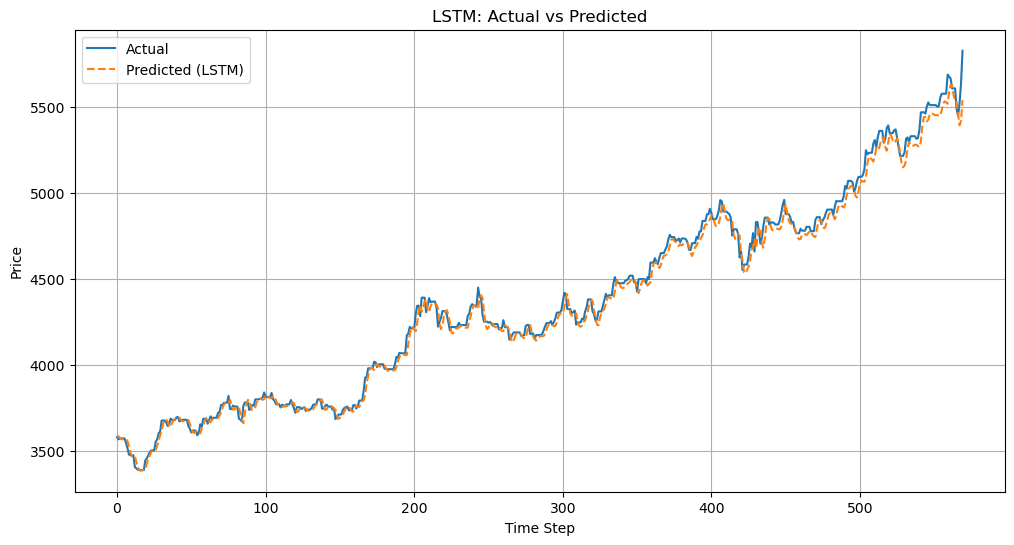

In [391]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(best_true, label='Actual')
plt.plot(best_pred, label='Predicted (LSTM)', linestyle='--')
plt.title("LSTM: Actual vs Predicted")
plt.xlabel("Time Step")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


In [245]:
def rolling_lstm_cv(series_scaled, window_size, units, batch_size, epochs=50, splits=5):
    X, y = create_dataset(series_scaled, window_size)
    total_len = len(X)
    fold_size = (total_len - window_size) // splits
    rmse_list, mape_list, r2_list = [], [], []

    for i in range(splits):
        split_point = window_size + i * fold_size
        X_train, X_val = X[:split_point], X[split_point:split_point+fold_size]
        y_train, y_val = y[:split_point], y[split_point:split_point+fold_size]

        X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
        X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))

        model = Sequential([LSTM(units, input_shape=(window_size, 1)), Dense(1)])
        model.compile(optimizer='adam', loss='mse')

        es = EarlyStopping(patience=5, restore_best_weights=True)
        model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1, callbacks=[es], verbose=10)

        y_pred = model.predict(X_val)
        y_pred_inv = scaler.inverse_transform(y_pred)
        y_val_inv = scaler.inverse_transform(y_val)
        rmse = np.sqrt(mean_squared_error(y_val_inv, y_pred_inv))
        mape = mean_absolute_percentage_error(y_val_inv, y_pred_inv)
        r2 = r2_score(y_val_inv, y_pred_inv)
        rmse_list.append(rmse)
        mape_list.append(mape)
        r2_list.append(r2)
        print(f"Fold {i+1}: RMSE={rmse:.4f}, MAPE={mape:.4f}, R²={r2:.4f}")

    print("\n✅ Cross-validation summary:")
    print(f"Mean RMSE: {np.mean(rmse_list):.4f}")
    print(f"Mean MAPE: {np.mean(mape_list):.4f}")
    print(f"Mean R²: {np.mean(r2_list):.4f}")

In [245]:
def rolling_lstm_cv(series_scaled, window_size, units, batch_size, epochs=50, splits=5):
    X, y = create_dataset(series_scaled, window_size)
    total_len = len(X)
    fold_size = (total_len - window_size) // splits
    rmse_list, mape_list, r2_list = [], [], []

    for i in range(splits):
        split_point = window_size + i * fold_size
        X_train, X_val = X[:split_point], X[split_point:split_point+fold_size]
        y_train, y_val = y[:split_point], y[split_point:split_point+fold_size]

        X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
        X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))

        model = Sequential([LSTM(units, input_shape=(window_size, 1)), Dense(1)])
        model.compile(optimizer='adam', loss='mse')

        es = EarlyStopping(patience=5, restore_best_weights=True)
        model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1, callbacks=[es], verbose=10)

        y_pred = model.predict(X_val)
        y_pred_inv = scaler.inverse_transform(y_pred)
        y_val_inv = scaler.inverse_transform(y_val)
        rmse, mape, r2 = get_metrics(y_val_inv, y_pred_inv, return_values=True)
        rmse_list.append(rmse)
        mape_list.append(mape)
        r2_list.append(r2)
        print(f"Fold {i+1}: RMSE={rmse:.4f}, MAPE={mape:.4f}, R²={r2:.4f}")

    print("\n✅ Cross-validation summary:")
    print(f"Mean RMSE: {np.mean(rmse_list):.4f}")
    print(f"Mean MAPE: {np.mean(mape_list):.4f}")
    print(f"Mean R²: {np.mean(r2_list):.4f}")

In [100]:
rolling_lstm_cv(series_scaled, window_size=7, units=32, batch_size=16, epochs=50, splits=9)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Fold 1: RMSE=70.1683, MAPE=0.0289, R²=-0.8365
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Fold 2: RMSE=17.0613, MAPE=0.0062, R²=0.8970
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Fold 3: RMSE=21.1784, MAPE=0.0065, R²=0.9846
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Fold 4: RMSE=48.0783, MAPE=0.0102, R²=0.9748
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Fold 5: RMSE=38.7669, MAPE=0.0082, R²=0.8419
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Fold 6: RMSE=68.1931, MAPE=0.0107, R²=0.9641
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Fold 7: RMSE=42.6287, MAPE=0.0100, R²=0.9791
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Fold 8: RMSE=45.4237, MAPE=0.0089, R²=0.9706
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Fold 9: RMSE=119.9438, MAPE=0.0192, R²=0.9142

✅ Cross-validation summary:
Mean RMSE: 52.3825
Mean MAPE: 0.0121
Mean R²: 0.7433


In [400]:
def rolling_lstm_cv(series_scaled, window_size, units, batch_size, epochs=50, splits=5):
    X, y = create_dataset(series_scaled, window_size)
    total_len = len(X)
    fold_size = (total_len - window_size) // splits
    rmse_list, mape_list, r2_list = [], [], []

    for i in range(splits):
        split_point = window_size + i * fold_size
        X_train, X_val = X[:split_point], X[split_point:split_point+fold_size]
        y_train, y_val = y[:split_point], y[split_point:split_point+fold_size]

        print(f"\n📊 Fold {i+1}:", f"  ➤ Train size: {X_train.shape[0]}", f"  ➤ Val size:   {X_val.shape[0]}")

        X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
        X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))

        model = Sequential([LSTM(units, input_shape=(window_size, 1)), Dense(1)])
        model.compile(optimizer='adam', loss='mse')

        es = EarlyStopping(patience=5, restore_best_weights=True)
        model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                  validation_split=0.1, callbacks=[es], verbose=0)

        y_pred = model.predict(X_val)
        y_pred_inv = scaler.inverse_transform(y_pred)
        y_val_inv = scaler.inverse_transform(y_val)
        rmse, mape, r2 = get_metrics(y_val_inv, y_pred_inv, return_values=True)
        rmse_list.append(rmse)
        mape_list.append(mape)
        r2_list.append(r2)

        print(f"  🔹 RMSE={rmse:.4f}, MAPE={mape:.4f}, R²={r2:.4f}")

    print("\n✅ Cross-validation summary:")
    print(f"Mean RMSE: {np.mean(rmse_list):.4f}")
    print(f"Mean MAPE: {np.mean(mape_list):.4f}")
    print(f"Mean R²: {np.mean(r2_list):.4f}")

In [401]:
rolling_lstm_cv(series_scaled, window_size=365, units=32, batch_size=16, epochs=50, splits=9)


📊 Fold 1:   ➤ Train size: 365   ➤ Val size:   236
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step
  🔹 RMSE=32.0256, MAPE=0.0102, R²=0.9046

📊 Fold 2:   ➤ Train size: 601   ➤ Val size:   236
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step
  🔹 RMSE=54.3607, MAPE=0.0127, R²=0.9608

📊 Fold 3:   ➤ Train size: 837   ➤ Val size:   236
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step
  🔹 RMSE=51.0036, MAPE=0.0097, R²=0.8102

📊 Fold 4:   ➤ Train size: 1073   ➤ Val size:   236
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step
  🔹 RMSE=37.0399, MAPE=0.0079, R²=0.7324

📊 Fold 5:   ➤ Train size: 1309   ➤ Val size:   236
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step
  🔹 RMSE=98.0532, MAPE=0.0164, R²=0.9431

📊 Fold 6:   ➤ Train size: 1545   ➤ Val size:   236
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 166ms/step
  🔹 RMSE=30.0891, MAPE=0.0074, R²=0.9876

📊 Fold 7:   ➤ Train size: 1781   ➤ Val size:   236
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step
  🔹 RMSE=31.2581, MAPE=0.0068, R²=0.8627

📊 Fold 8:   ➤ Train size: 2017   ➤ Val size:   236
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/

### Результат кросс-валидации:

✅ Cross-validation summary:

Mean RMSE: 53.0577

Mean MAPE: 0.0105

Mean R²: 0.8965

# CatBoost

In [51]:
from catboost import CatBoostRegressor
train_size = int(len(df1) * 0.80)
X = df.drop(columns=["price"])
y = df["price"]
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]
cb = CatBoostRegressor(verbose=0)
cb.fit(X_train, y_train)

y_pred = cb.predict(X_test)

get_metrics(y_test, y_pred)

RMSE: 969.6090
MAPE: 0.1698
R²: -1.8059


In [ ]:
from itertools import product

depths = [3, 4, 6, 10]
learning_rates = [0.01, 0.03, 0.05]
iterations = [100, 300, 500, 1000]

best_rmse = float("inf")
best_model = None
best_params = None
best_pred = None

for depth, lr, n_iter in product(depths, learning_rates, iterations):
    print(f"depth={depth}, lr={lr}, iterations={n_iter}")
    
    model = CatBoostRegressor(
        depth=depth,
        learning_rate=lr,
        iterations=n_iter,
        verbose=0
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    rmse, mape, r2 = get_metrics(y_test, y_pred, return_values=True)

    if rmse < best_rmse:
        best_rmse = rmse
        best_model = model
        best_params = (depth, lr, n_iter)
        best_pred = y_pred

print(f"\n depth={best_params[0]}, learning_rate={best_params[1]}, iterations={best_params[2]}")
get_metrics(y_test, best_pred)

# Проверка на абсолютно новых данных

In [145]:
remaining_data = pd.read_excel("Парсинг_остальных_данных.xlsx")
remaining_data.columns = ['date', 'price']
remaining_data['date'] = pd.to_datetime(remaining_data['date'])
remaining_data = remaining_data.set_index('date')
remaining_data.head()

,price
date,
2025-04-13,5829.06
2025-04-14,5829.06
2025-04-15,5836.56
2025-04-16,5842.28
2025-04-17,5969.17


In [136]:
from tensorflow.keras.callbacks import EarlyStopping

window = 14
units = 32
batch_size = 16
epochs = 50  

X, y = create_dataset(data, window)
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

lstm = Sequential([LSTM(units, input_shape=(window, 1)), Dense(1)])
lstm.compile(optimizer='adam', loss='mse')

es = EarlyStopping(patience=5, restore_best_weights=True)
lstm.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1, callbacks=[es], verbose=0)
y_pred = lstm.predict(X_test)
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test)
get_metrics(y_test_inv, y_pred_inv)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
RMSE: 45.8320
MAPE: 0.0074
R²: 0.9937


91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


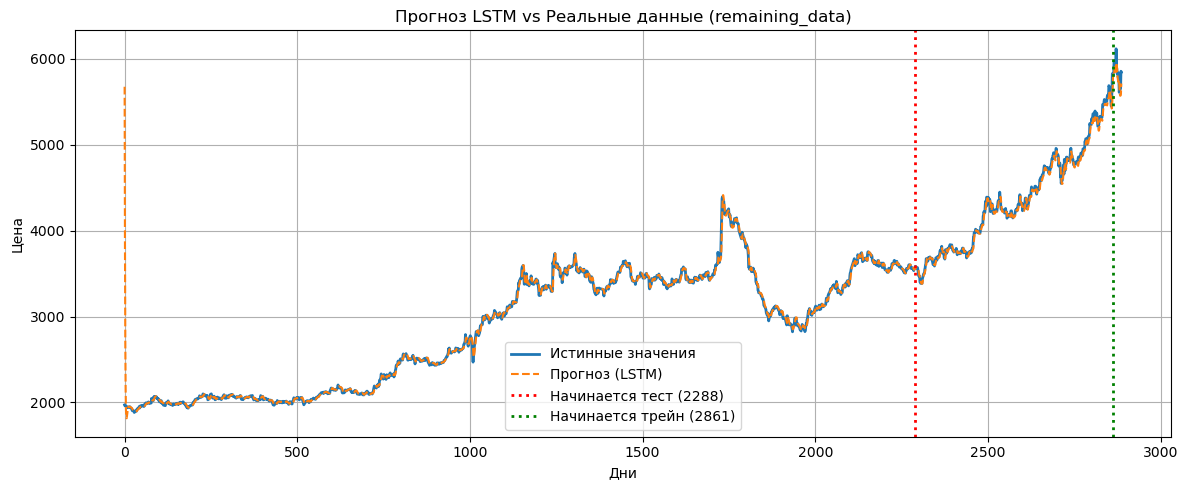

RMSE: 85.6829
MAPE: 0.0075
R²: 0.9913


In [231]:
all_df = pd.concat([df1, remaining_data])
all_df_scaled = scaler.transform(all_df[['price']].values)
window = 14
last_known = data[-window:] 
full_input = np.concatenate([last_known, all_df_scaled])

X_remain, y_remain = create_dataset(full_input, window)
X_remain = X_remain.reshape((X_remain.shape[0], X_remain.shape[1], 1))

y_pred = lstm.predict(X_remain)
y_pred_inv = scaler.inverse_transform(y_pred)
y_true_inv = scaler.inverse_transform(y_remain.reshape(-1, 1))

plt.figure(figsize=(12, 5))
plt.plot(y_true_inv, label='Истинные значения', linewidth=2)
plt.plot(y_pred_inv, label='Прогноз (LSTM)', linestyle='--')
plt.axvline(x=2288, color='red', linestyle=':', linewidth=2, label='Начинается тест (2288)')
plt.axvline(x=2861, color='green', linestyle=':', linewidth=2, label='Начинается трейн (2861)')
plt.title("Прогноз LSTM vs Реальные данные (remaining_data)")
plt.xlabel("Дни")
plt.ylabel("Цена")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

get_metrics(y_true_inv, y_pred_inv)

In [235]:
lstm.save_weights("lstm_model.weights.h5")